# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them next week, but we will be using some of their functionalities.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import sys
# !{sys.executable} -m pip install seaborn

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [2]:
#your code here
diamonds = pd.read_csv('../M2-mini-project1/diamonds.csv')
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
#dropping column with the index
diamonds = diamonds.drop('Unnamed: 0',axis=1)

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [4]:
#your code here
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [5]:
#your code here
""" The first thing I notice is that there are 3 columns for which the name of the column doesn't
say much: x,y,z
The cut, clarity and color columns are categorical 
the clarity and color have a 'best to worst' 'value' that could eventually be 
translated into quantitative data
The price seem to be put in int?

"""

" The first thing I notice is that there are 3 columns for which the name of the column doesn't\nsay much: x,y,z\nThe cut, clarity and color columns are categorical \nthe clarity and color have a 'best to worst' 'value' that could eventually be \ntranslated into quantitative data\nThe price seem to be put in int?\n\n"

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [6]:
#your code here
diamonds.shape

# there are 53940 rows (diamonds checked) and 10 columns (characteristics of the 
# diamonds in our data)'''

(53940, 10)

The `clarity` column is confusing because we are not diamond experts. Let's create a new column with a new scale that is more understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [7]:
#your code here

# From the description of the columns, i see that the clarity is classified into 7 categories 
# from worst to best:
# I1:0,SI2:1,SI1:2,VS2:3,VS1:4,VVS2:5,VVS1:6,IF:7'''
#To do this, I will define conditions and outputs to be satisfied

conditions = [ 
    diamonds['clarity']== 'I1',
    diamonds['clarity']== 'SI2',
    diamonds['clarity']== 'SI1',
    diamonds['clarity']== 'VS2',
    diamonds['clarity']== 'VS1',
    diamonds['clarity']== 'VVS2',
    diamonds['clarity']== 'VVS1',
    diamonds['clarity']== 'IF',
]

outputs =[0,1,2,3,4,5,6,7]
#using numpy.select, I will add the results to a new column clarity values

diamonds['clarity values']= np.select(conditions, outputs, 'Other')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity values
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1


It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [8]:
#your code here

# the colour only tells the min and max J or D. One could assume that 
# the categories follow alphabetical order, but I prefer to double check.
# After searching the correct order I found the following conditions to be matched:'''

conditions = [ 
    diamonds['color']== 'J',
    diamonds['color']== 'I',
    diamonds['color']== 'H',
    diamonds['color']== 'G',
    diamonds['color']== 'F',
    diamonds['color']== 'E',
    diamonds['color']== 'D',
]

outputs =[0,1,2,3,4,5,6]

diamonds['color values']= np.select(conditions, outputs, 'Other')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity values,color values
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,6
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,6
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,2


With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [9]:
#your code here
diamonds.info()
#This feature gives more information about the dataframe:
#not only columns and rows, but if there are null values, the type of the columns data & rows,
#and the class. In here we can see that all numerical data is in decimals except for the price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           53940 non-null  float64
 1   cut             53940 non-null  object 
 2   color           53940 non-null  object 
 3   clarity         53940 non-null  object 
 4   depth           53940 non-null  float64
 5   table           53940 non-null  float64
 6   price           53940 non-null  int64  
 7   x               53940 non-null  float64
 8   y               53940 non-null  float64
 9   z               53940 non-null  float64
 10  clarity values  53940 non-null  object 
 11  color values    53940 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 4.9+ MB


In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [10]:
#your code here
diamonds.dtypes

#I think depht and table are percentages so yes, type should be float
#I thought price would be a float, and cut and color a string

carat             float64
cut                object
color              object
clarity            object
depth             float64
table             float64
price               int64
x                 float64
y                 float64
z                 float64
clarity values     object
color values       object
dtype: object

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [11]:
#your code and comments here
diamonds.describe()

#This method gives us the descriptive statistic tools such as 
#mean,standard deviation, min, max and quartiles but it seems that some of the diamonds in this
#data have a minimum lenght, width or depht of 0 (which would be impossible for any object)


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [12]:
#your code here
# diamonds[['x', 'y','z']].isnull()==True
#diamonds[['x','y','z']].isnull().sum()

""" When looking at the 0 values for x, I see that all the z values for these values 
are also 0 but 1 of the values is not 0 for y.
when looking at the 0 values for y, I notice that all the x and z values are also 0
When looking for the 0 values of z, I notice the 0 values for x and y but other rows when the values 
for x and y are not 0

"""

print(diamonds.loc[diamonds['x']== 0.0])
print(diamonds.loc[diamonds['y']== 0.0])
print(diamonds.loc[diamonds['z']== 0.0])




       carat        cut color clarity  depth  table  price    x     y    z  \
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.0  6.62  0.0   
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.00  0.0   
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.00  0.0   
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.00  0.0   
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.00  0.0   
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.00  0.0   
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0   
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0   

      clarity values color values  
11182              1            4  
11963              3            2  
15951              4            3  
24520              3            3  
26243              6            6  
27429              1            2  
49556              1            4  
49557    

In [13]:
# x_y = diamonds.loc[diamonds['x']== diamonds['y'] ]
# x_y_0 = diamonds.loc[diamonds['x']==0]
# x_y_0
#diamonds.loc[(diamonds['x']==0) & (diamonds['y']==0)]
# ''' I was confused on how to locate the 0 values to be dropped.
# then realized that all values were under the lenght column 'x'
# '''
#getting the index of the rows to drop and dropping them on axis =0

x_is0 = diamonds.loc[diamonds['x']==0].index

#diamonds = diamonds.drop(x_is0, axis =0)
#verification
diamonds.shape 

(53940, 12)

As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [14]:
#your code here
z=0
def calculate_z(line):
    if line.z == 0.0:
        return (line.depth*(line.x + line.y)/200)
    else:
        return line.z
    
# calculate_z(z)

**Apply it just to the rows with incorrect values**

In [15]:
#your code here
diamonds['z'] = diamonds.apply(lambda row: calculate_z(row), axis=1)
diamonds


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity values,color values
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,6
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,6
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,2


In [16]:
diamonds.loc[diamonds['x']== 0]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity values,color values
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,2.03896,1,4
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.00000,3,2
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.00000,4,3
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.00000,3,3
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.00000,6,6
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.00000,1,2
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.00000,1,4
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.00000,1,4


If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [17]:
#your code here
diamonds = diamonds.replace(0,np.NaN)
diamonds
diamonds.isnull().sum()

carat             0
cut               0
color             0
clarity           0
depth             0
table             0
price             0
x                 8
y                 7
z                 7
clarity values    0
color values      0
dtype: int64

----
# Bonus: check the new z values
Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [18]:
#your code here
def validate_z(line):
    return 2*line.z/(line.x+line.y)==line.depth
    
# diamonds['depth'] = diamonds.apply(lambda row: validate_z(row), axis=1)
# diamonds


In [19]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53933.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540238
std,0.474011,1.432621,2.234491,3989.439738,1.119670,1.140339,0.702690
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Let's check the data again with the `describe()` method.

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [20]:
#your code here
diamonds.isnull().sum()
# I see only the NaN values introduced manually. Since they represent only a very small part of my data (8/53940 rows)
# they will not be affecting my data significantly, so I will drop them.

null_values = diamonds.loc[(diamonds['x'].isnull()==True)].index
diamonds = diamonds.drop(null_values, axis=0)
diamonds



,carat,cut,color,clarity,depth,table,price,x,y,z,clarity values,color values
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,6
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,6
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,2


# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [21]:
#your code here
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540265
std,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.702667
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [22]:
#your comments here

#There seem to be a big gap between the 3rd prrcentile and the Max in lnght, table, but specially in price


To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [23]:
#your code here
diamonds.loc[(diamonds['price']>diamonds['price'].quantile(0.75))]

#There are still 13481 diamonds in this subset, which is more or less 25% of the original data set. Quite 
# significantly high for it to all be outliers. Also the price range is still quite high (5K-18K)

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity values,color values
12765,1.07,Ideal,E,SI2,62.2,55.0,5325,6.54,6.58,4.08,1,5
12766,1.11,Ideal,H,SI1,60.6,59.0,5325,6.75,6.71,4.08,2,2
12767,1.14,Premium,G,SI1,62.2,58.0,5326,6.64,6.70,4.15,2,3
12768,1.07,Premium,H,VS2,62.1,59.0,5327,6.52,6.56,4.06,3,2
12769,1.33,Very Good,J,SI1,64.0,53.0,5327,6.93,7.01,4.46,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,2,2
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,1,3
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,7,3
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,2,3


Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

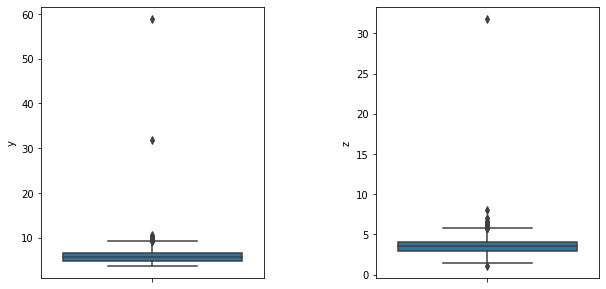

In [24]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [25]:
#your code here
diamonds.loc[(diamonds['z']>10)]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity values,color values
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8,4,5


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [26]:
#your code here
diamonds.z[48410]=0
diamonds['z'] = diamonds.apply(lambda row: calculate_z(row), axis =1)


<ipython-input-26-516a40da461b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds.z[48410]=0


Let's check if we actually corrected the outlier.

In [27]:
diamonds.loc[48410]

carat                  0.51
cut               Very Good
color                     E
clarity                 VS1
depth                  61.8
table                  54.7
price                  1970
x                      5.12
y                      5.15
z                   3.17343
clarity values            4
color values              5
Name: 48410, dtype: object

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [28]:
#your code here

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [29]:
#your code here
diamonds.loc[(diamonds['y']>10)]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity values,color values
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,1,2
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,0,1
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,0,0
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,0,0
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,4,5


We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [30]:
#your code here

diamonds['y'][24067]=0
diamonds['y'][49189]=0

def calculate_y(line):
    if line.y == 0.0:
        return (200*line.z/line.depth)-line.x
    else:
        return line.y

diamonds['y'] = diamonds.apply(lambda row: calculate_y(row), axis=1)
diamonds.loc[(diamonds['y']>10)]

<ipython-input-30-f52684d8daca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds['y'][24067]=0
<ipython-input-30-f52684d8daca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds['y'][49189]=0


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity values,color values
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,19.278421,8.06,1,2
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.100000,6.17,0,1
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.540000,6.98,0,0
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.160000,6.72,0,0
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,11.419579,5.12,4,5


In [31]:
def validate_y(line):
    return 200*line.z/(line.x+line.y)==line.y
# diamonds['depth'] = diamonds.apply(lambda row: validate_y(row), axis=1)
# diamonds

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

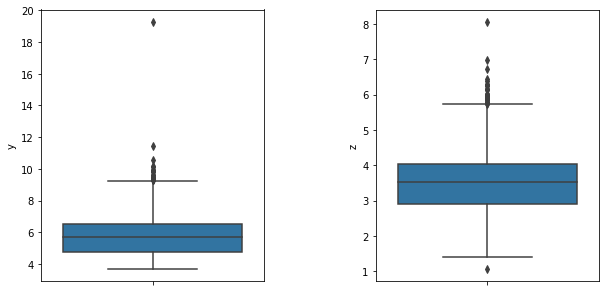

In [32]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [33]:
#your thoughts here

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [34]:
#your code here